# Exploratory data analysis (EDA)

## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
    *  We are using petal and sepal dimensionas as features to measure the length and the width from each samples and distinguish them 
* Why do we not use 'color' as a feature?
    * Color is not used as the feature because it's hard to differentiate the characteristics of the species using the colors as feature.


Firstly downlaod the IRIS dataset iris.csv from  https://www.kaggle.com/uciml/iris

### 1. Import Data & Python Packages 

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Load tweets.csv into a pandas dataFrame.
iris =pd.read_csv('iris.csv')

In [16]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 6)


In [17]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Observations:** *print (tweets.shape)* gives us the shape of the Tweets dataset i.e it tells us about the datapoint  to be 150 and also consists of 5 feature points

In [18]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
#(Q) What are the column names in our dataset?
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

In [20]:
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

####  Is it balanced-dataset or imbalanced datasets?
 Iris is a balanced dataset as the number of data points for every class is 50.
 
 **Observations:** ***.value_counts()*** gives us the exact count of datapoints and tells us whether the dataset is balanced or imbalanced datasets.  

From the above output, its clear that IRIS dataset is **Balanced dataset** with 50 classes of datapoints for each species.

## 1.1  2-D Scatter Plot

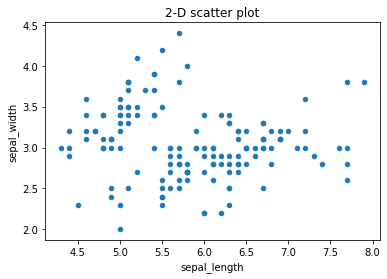

In [22]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width', title='2-D scatter plot');
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


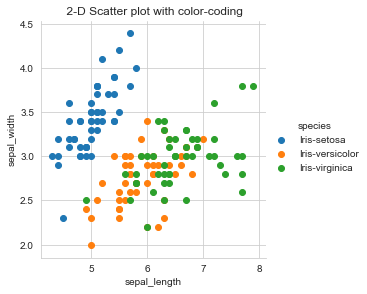

In [23]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.title(' 2-D Scatter plot with color-coding')
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many combinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.
3. from the above code we can draw multiple 2-D scatter plots for each combination of features
4. ** How many combinations exist? 4C2 = 6.**
    * Number of Combinations of features : 4C2 = 6 (excluding class-attribute 'species')

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

##  1.2 Pair-plot

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


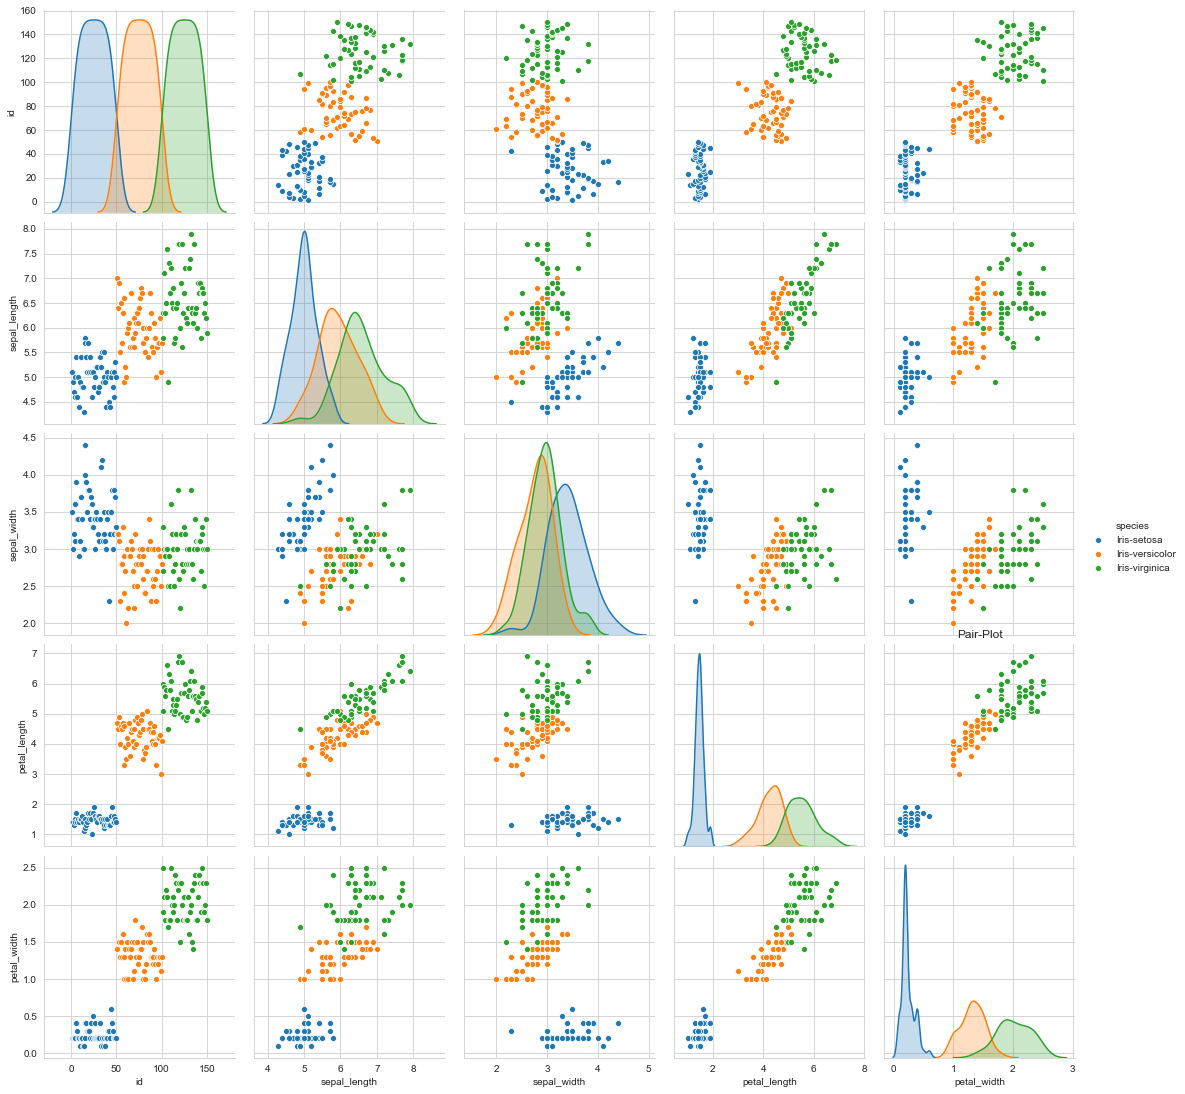

In [24]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.title('Pair-Plot')
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## 1.3 Histogram, PDF, CDF

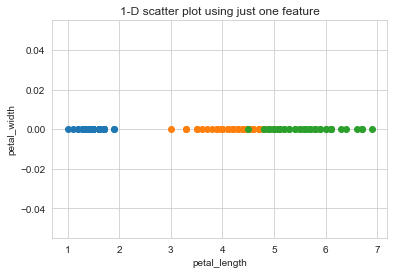

In [25]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"];
#print(iris_setosa["petal_length"])


plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')
plt.title('1-D scatter plot using just one feature')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?
   

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


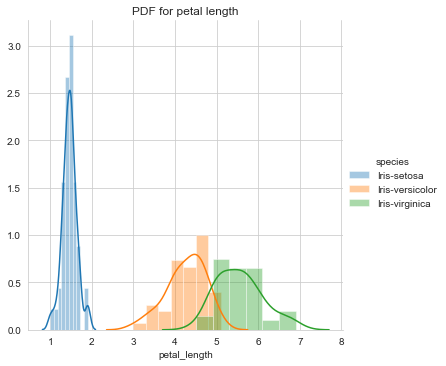

In [26]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.title('PDF for petal length')
plt.show();

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


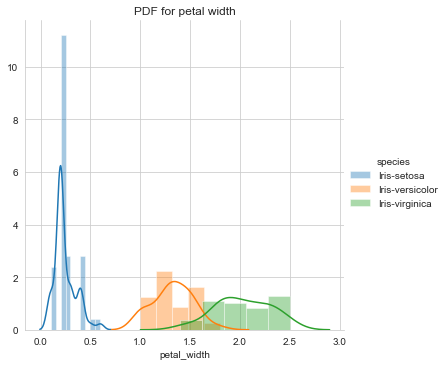

In [27]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.title('PDF for petal width')
plt.show();

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


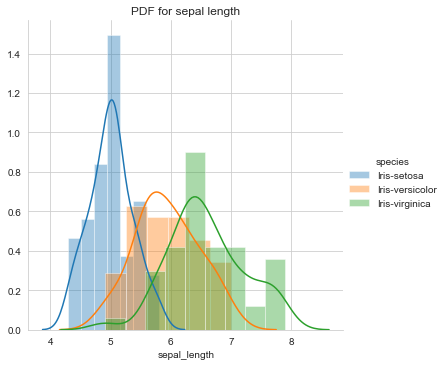

In [28]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.title('PDF for sepal length')
plt.show();

C:\Users\ANUNAYANA\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


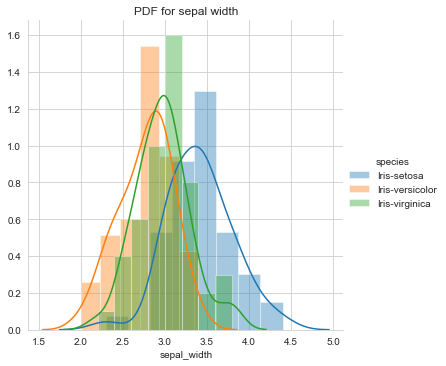

In [29]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.title('PDF for sepal width')
plt.show();

## Histograms and Probability Density Functions (PDF) using KDE
** How to compute PDFs using counts/frequencies of data points in each window.**
** How window width effects the PDF plot.**


## Interpreting a PDF:
* ** why is it called a density plot? (or) Why is it called a probability plot?**
    * It’s used in determining the distribution shape as it doesn’t get affected by the number of bins used (each bar used in a typical histogram).
   

** Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

*** Do some of these plots look like a bell-curve you studied in under-grad?***

* ** Gaussian/Normal distribution.**
    * It’s the statistical model to represent a real time random values whose values are not known. Its represented in the form of curves which are in bell shape.

* ** What is "normal" about normal distribution?(e.g: Hieghts of male students in a class.)**
    * Here in the Gaussian/Normal distribution, the random values are said to be normal. e.g.heights of the students in the class can normally distributed by values/ variables like height of male students and heights of female students.  
    * Its one of the most frequently used distributions in nature.


C:\Users\ANUNAYANA\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


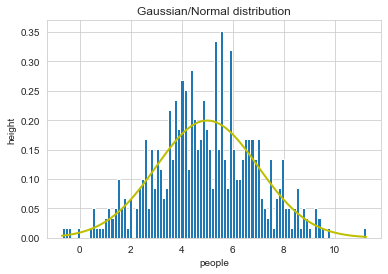

In [30]:
class height:
    def __init__(self, h1, h2, h3):
        self.height1 = h1
        self.height2 = h2
        self.height3 = h3
        
    def dist_curve(self):
        plt.plot(self.height3, 1/(self.height2 * np.sqrt(2 * np.pi)) * np.exp( - (self.height3 - self.height1)**2 / (2 * self.height2**2) ), linewidth=2, color='y')
        plt.show()

# the mean and SD for different plots
mean = 5 ; sd = 2

c = np.random.normal(mean, sd, 500)       
m1, m2, m3 = plt.hist(c, 100, normed=True) #histogram

hist1 = height(mean, sd, m2)
plt.title('Gaussian/Normal distribution')
plt.xlabel('people')
plt.ylabel('height')
plot1 = hist1.dist_curve()


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


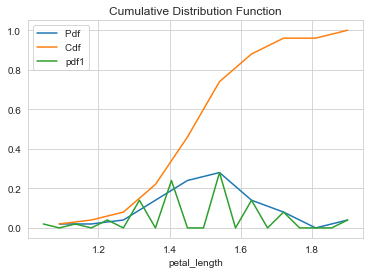

In [31]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal_length of less than 5?
# How to read a CDF?
# * CDF could be read the curves in reverse, setting a probability value and asking about the generations corresponding to the values.
# How to construct a CDF? or Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.legend(['Pdf ','Cdf ','pdf1'])
plt.title('Cumulative Distribution Function')
plt.xlabel('petal_length')
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


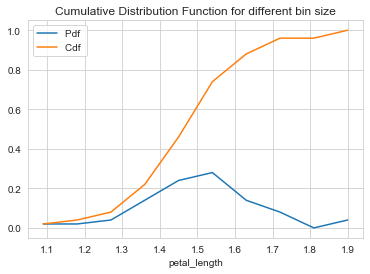

In [32]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf ','Cdf '])
plt.title('Cumulative Distribution Function for different bin size')
plt.xlabel('petal_length')
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


C:\Users\ANUNAYANA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\ANUNAYANA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\ANUNAYANA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 'f' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


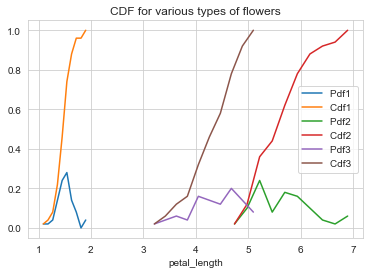

In [33]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend('pdf','cdf')
# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['Pdf1 ','Cdf1 ','Pdf2 ','Cdf2 ','Pdf3 ','Cdf3 '])
plt.title('CDF for various types of flowers')
plt.xlabel('petal_length')
plt.show();

## 1.4 Mean, Variance and Std-dev

In [34]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


## 1.5 Median, Percentile, Quantile, IQR, MAD

In [35]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## 1.6 Box plot and Whiskers

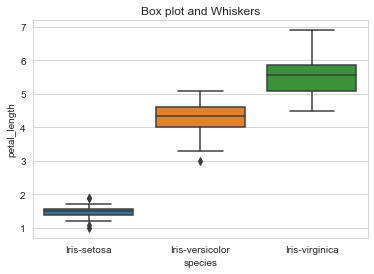

In [36]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)    
plt.title('Box plot and Whiskers')
plt.show()

## 1.7 Violin plots

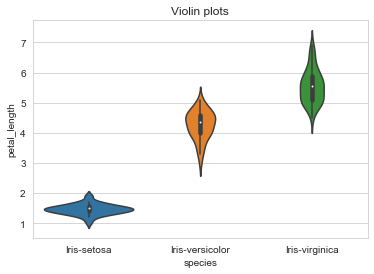

In [37]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=10)
plt.title('Violin plots')
plt.show()

## 1.8 Univariate, bivariate and multivariate analysis.
Def: Univariate, Bivariate and Multivariate analysis.

* **Univariate:** It's the simplest form of analysing the data. The data has only one variable and does not deal with the regression
* **Bivariate:** It's the analysis of two variables resulting in a relationship between the variables
* **Multivariate** It's the technique of analysing the dataset with more than two variables and it uses this on correlated variables.

## 1.9 Multivariate probability density, contour plot.

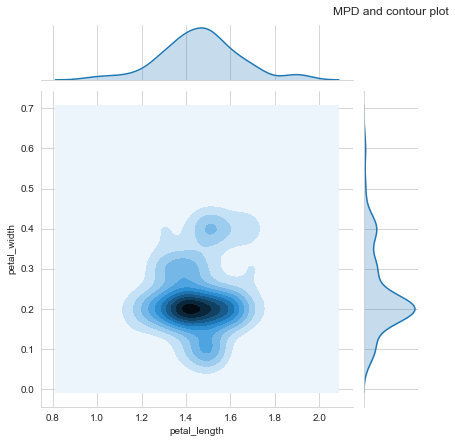

In [38]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.title('MPD and contour plot\n \n \n \n\n\n')
plt.show();

In [39]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]

In [40]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)

Ks_2sampResult(statistic=0.46, pvalue=3.800827929128319e-05)

In [41]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')

KstestResult(statistic=0.36263881074716586, pvalue=0.11008898289879242)

In [42]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.15491028495792436, pvalue=0.014620314553590797)

In [43]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=0.07290719246967359, pvalue=4.5551125586844924e-05)

## 1.10 Summarizing plots in english
* Explain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

The IRIS dataset consists of 150 datapoints with 5 featuresets. This feature sets are:
    1. sepal length
    2. sepal width
    3. petal length
    4. petal width
    5. species
This flowers are balanced dataset with 50 flowers belonging to each species being the elements being non-null with float values. The dataset consists of 3 types of species:
    1. Setosa
    2. Versicolor
    3. Virginica
With the 2-D scattering of the species i.e. sepal length, sepal width, petal length and petal width results in the scattering of the datapoints plotted in **blue color** which makes it difficult to differentiat between the species (setosa, virginica and versicolor)

So to overcome this drawback we use **2-D Scatter plot with color-coding for each species** i.e. on sepal length, sepal width, petal length and petal width which changes the color from blue to red, blue, green.

But in the IRIS dataset after 2-D Scatter plot with color-coding for each species, its clear that setosa can be differentiated easily whereas differentiaing the Versicolor and Virginica is difficult because they overlap each other.

The **Pair-plot** is used to plot pairwise scattered data. But it can visualise only 2D patterns and not the high dimensional patterns like 3D and nD.

So to differentiate the species from each other we use Univariate, Bivariate and Multivariate analysis to differentiate the flower or to know the exact plotting. 

Lastly we calcuate the **Mean, Std dev, Median etc** values from all the three flower species and  **the contour plot** is calculated.


